In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.DataFrame()

In [6]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["Label"]=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,Label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

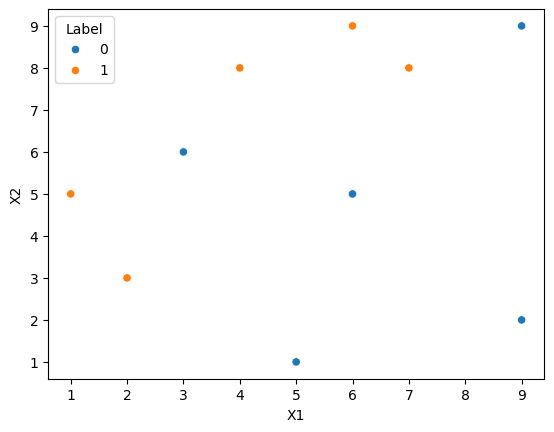

In [10]:
import seaborn as sns
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["Label"])

In [12]:
df["Weight"]=1/len(df["X1"])  # or df["Weight"]=1/df.shape[0]

In [14]:
df

,X1,X2,Label,Weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt1=DecisionTreeClassifier(max_depth=1)

In [20]:
X=df.iloc[ :, 0:2].values #np array
y=df.iloc[:,2].values

In [22]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [24]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

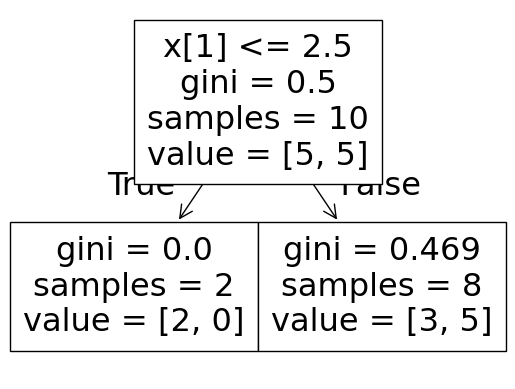

In [26]:
plot_tree(dt1)  #X[0]=first column

<Axes: >

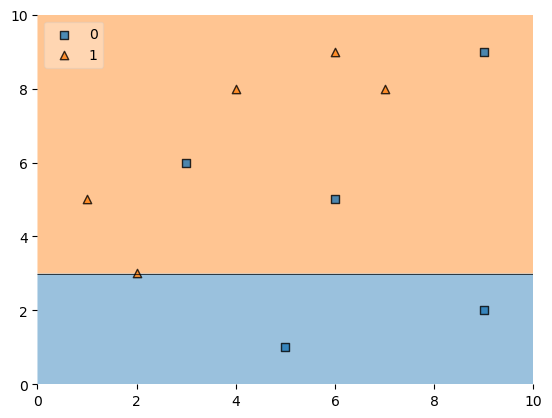

In [28]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [30]:
df["y_pred"]=dt1.predict(X)

In [32]:
df

,X1,X2,Label,Weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [34]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [36]:
alpha1=calculate_model_weight(0.3)# total error is 0.3 bcz in 3rd, 5th and 7th index the label and y_pred are wrong.
alpha1

0.42364893019360184

In [38]:
def update_row_weights(row,alpha=0.423):
    if row["Label"]== row["y_pred"]:
        return row["Weight"]*np.exp(-alpha)
    else:
        return row["Weight"]*np.exp(alpha)

In [40]:
df["Updated_weights"]=df.apply(update_row_weights,axis=1)

In [42]:
df

,X1,X2,Label,Weight,y_pred,Updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [44]:
df["Normalized_weights"]=df["Updated_weights"]/df["Updated_weights"].sum()
df

,X1,X2,Label,Weight,y_pred,Updated_weights,Normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [46]:
df["cumsum_upper"]=np.cumsum(df["Normalized_weights"])

In [98]:
df["cumsum_lower"]=df["cumsum_upper"]-df["Normalized_weights"]

In [99]:
df[["X1","X2","Label","Weight","y_pred","Updated_weights","cumsum_lower","cumsum_upper"]]

,X1,X2,Label,Weight,y_pred,Updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [101]:
def create_new_dataset(df):
    
    indices=[]
    
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row["cumsum_upper"] > a and a > row["cumsum_lower"]:
                indices.append(index)
    return indices

In [53]:
index_value= create_new_dataset(df)
index_value

[5, 1, 5, 8, 2, 2, 8, 9, 1, 6]

In [54]:
second_df=df.iloc[index_value,[0,1,2,3]]
second_df

,X1,X2,Label,Weight
5,6,9,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1


In [56]:
dt2=DecisionTreeClassifier(max_depth=1)

In [58]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [60]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.625, 0.5, '  False')]

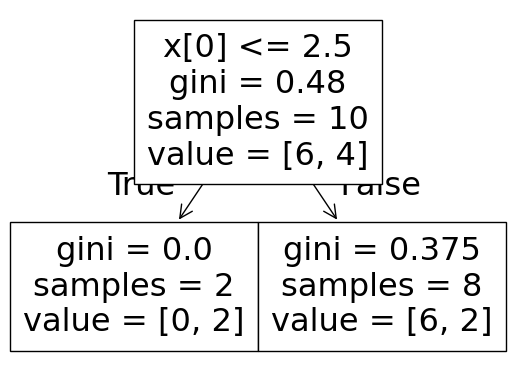

In [62]:
plot_tree(dt2)

<Axes: >

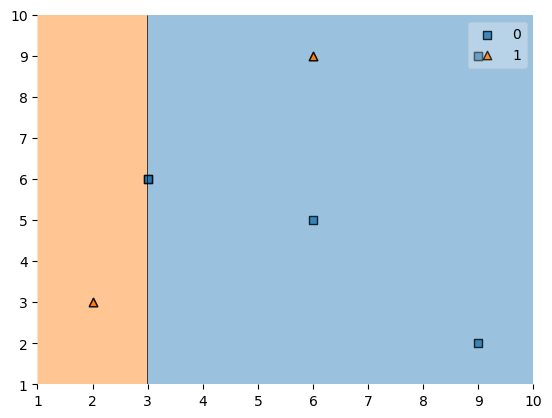

In [69]:
plot_decision_regions(X,y, clf=dt2)

In [70]:
second_df["y_pred"]=dt2.predict(X)

In [72]:
second_df

,X1,X2,Label,Weight,y_pred
5,6,9,1,0.1,0
1,2,3,1,0.1,1
5,6,9,1,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0


In [78]:
def calculate_error(error):
    return 0.5*np.log((1-error)/error)

In [106]:
alpha2=calculate_error(0.2)
alpha2

0.6931471805599453

In [107]:
#Update the weights
def update_weight(row,alpha2=0.6931471805724453):
    if row["Label"]==row["y_pred"]:
        return row["Weight"]* np.exp(-alpha2)
    else:
        return row["Weight"]* np.exp(alpha2)

In [82]:
second_df["Updated_weights"]=second_df.apply(update_weight,axis=1)

In [84]:
second_df

,X1,X2,Label,Weight,y_pred,Updated_weights
5,6,9,1,0.1,0,0.20
1,2,3,1,0.1,1,0.05
5,6,9,1,0.1,0,0.20
8,9,9,0,0.1,0,0.05
2,3,6,0,0.1,0,0.05
2,3,6,0,0.1,0,0.05
8,9,9,0,0.1,0,0.05
9,9,2,0,0.1,0,0.05
1,2,3,1,0.1,1,0.05
6,6,5,0,0.1,0,0.05


In [87]:
second_df["normalized_weight"]=second_df["Updated_weights"]/second_df["Updated_weights"].sum()

In [89]:
second_df

,X1,X2,Label,Weight,y_pred,Updated_weights,normalized_weight
5,6,9,1,0.1,0,0.20,0.2500
1,2,3,1,0.1,1,0.05,0.0625
5,6,9,1,0.1,0,0.20,0.2500
8,9,9,0,0.1,0,0.05,0.0625
2,3,6,0,0.1,0,0.05,0.0625
2,3,6,0,0.1,0,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
9,9,2,0,0.1,0,0.05,0.0625
1,2,3,1,0.1,1,0.05,0.0625
6,6,5,0,0.1,0,0.05,0.0625


In [91]:
second_df["cumsum_upper"]=np.cumsum(second_df["normalized_weight"])

In [93]:
second_df["cumsum_lower"]=second_df["cumsum_upper"]-second_df["normalized_weight"]

In [95]:
second_df

,X1,X2,Label,Weight,y_pred,Updated_weights,normalized_weight,cumsum_upper,cumsum_lower
5,6,9,1,0.1,0,0.20,0.2500,0.2500,0.0000
1,2,3,1,0.1,1,0.05,0.0625,0.3125,0.2500
5,6,9,1,0.1,0,0.20,0.2500,0.5625,0.3125
8,9,9,0,0.1,0,0.05,0.0625,0.6250,0.5625
2,3,6,0,0.1,0,0.05,0.0625,0.6875,0.6250
2,3,6,0,0.1,0,0.05,0.0625,0.7500,0.6875
8,9,9,0,0.1,0,0.05,0.0625,0.8125,0.7500
9,9,2,0,0.1,0,0.05,0.0625,0.8750,0.8125
1,2,3,1,0.1,1,0.05,0.0625,0.9375,0.8750
6,6,5,0,0.1,0,0.05,0.0625,1.0000,0.9375


In [103]:
index_value=create_new_dataset(second_df)

In [109]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [111]:
# Prediction

query=np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [113]:
dt2.predict(query)

array([1], dtype=int64)

In [117]:
alpha1*1+ alpha2*1 #If we get 0 then we have to multiply the alpha with (-1)

1.1167961107535471

In [118]:
np.sign(1.1167961107535471) #Output=1

1.0